# **Competencia 1 - CC6205 Natural Language Processing 📚**

Departamento de Ciencias de la Computación, Universidad de Chile.

CC6205: Procesamiento de Lenguaje Natural - Otoño 2023

**Integrantes:** Tomás Banduc, Arturo Lazcano, Yeniffer Muñoz

**Usuario del equipo en CodaLab:** la keso


## **1. Introducción**


En la sociedad contemporánea actual, el acceso y uso de redes sociales ha extendido el sentido de mera comunicación interpersonal, ocio y exhibición de la actividad diaria individual a un tránsito masivo de información capaz de influir sobre grandes colectivos humanos en aspectos educacionales, económicos, conductuales, políticos y sociales. Las redes pasan a ser espacios tanto de uso educativo como comercial, medios de transmisión de información saturados y de opiniones políticas diversas, que se encuentran exentos de la regulación y fiscalización de las entidades estatales y de legislaciones que aboquen por la penalización y criminalización del uso violento del lenguaje, y la explícita intolerancia, la incitación al odio y la abierta discriminación hacia determinadas razas, etnias y colectivos de diversidades y disidencias sexuales y de género, transgrediendo derechos individuales, la dignidad y noción de igualdad, afectando la convivencia, la paz, e incrementando la tensión entre las comunidades que componen a la sociedad.

En dicho contexto, se presentan como problema esencial en redes sociales la realización y difusión de discursos de odio y de la incivilidad en ellas. El discurso de odio es cualquier expresión que promueva o incite a la discriminación, la hostilidad o la violencia hacia una persona o grupo de personas en una relación asimétrica de poder, tal como la raza, la etnia, el género, la orientación sexual, la religión, la nacionalidad, una discapacidad u otra característica similar. Por otro lado, la incivilidad se refiere a cualquier comportamiento o actitud que rompe las normas de respeto, cortesía y consideración en la interacción entre personas. Esta puede manifestarse de diversas formas, tal como insultos, ataques personales, sarcasmo, desprecio, entre otras.

Así, se vuelve necesario identificar este tipo de discursos y comportamientos para tomar medidas efectivas contra su propagación y quienes las transmiten.

En el presente informe, se detallan las representaciones, algoritmos, experimentos y conclusiones realizadas en el marco de la Competencia 1 del curso de Procesamiento de Lenguaje Natural, donde se utilizaron métodos de aprendizaje de máquinas empírico en el reconocimiento de discursos de odio e incivilidad. La tarea principal correspondió a clasificar inputs de texto dentro de las siguientes categorías: "incivilidad", "odio" y "normal". El desafío fue generar un modelo que, a partir de un corpus de texto con sus documentos etiquetados según dichas clases, fuera capaz de determinar la pertenencia de texto no observado en alguna de ellas.

La dificultad de lo anterior reside en tener que trabajar con discursos emotivos, con uso casual de jerga que puede ser considerada violenta en contextos normales y texto potencialmente defectuoso en su sentido estructural por fallas gramaticales, faltas ortográficas, fallas sintácticas y ambigüedades semánticas dadas por la subjetividad en la emisión del mensaje. Adicionalmente, por ejemplo, hay expresiones, caracteres o emojis que denotan intenciones claras al añadirse en una oración, característica que en otros problemas de clasificación de texto no se hubieran considerado.



## **2. Representaciones**


La representación de datos empleada viene dada por la unión de características generadas manualmente y por los atributos generados según un esquema de 5,6-gramas. Las *features* extraídas manualmente corresponden con el conteo de signos de exclamación (!), interrogación (?), *hashtags* (#), arrobas (@), puntos suspensivos (...), emojis con sentido simbólico negativo y con tono positivo, palabras prolongadas, palabras en mayúscula, palabras de connotación positiva, palabras de connotación negativa (obtenidas de un lexicon disponible a través de [Github](https://github.com/kicorangel/RD-Lab/tree/master/resources/Afffectivity/Spanish%20Opinion%20Lexicon)), frases de carácter violento (según un lexicon creado por el grupo con insultos chilenos), y largo del *tweet*.

Los 5,6-gramas empleados se obtuvieron a través de la función [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.build_preprocessor) disponible en la librería *scikit-learn* y operaron a nivel de caracteres y sin *padding*, es decir, se contabilizaban los 5-gramas y 6-gramas de letras presentes en cada documento dentro de los límites del texto sin rellenar los extremos de los tweets.

Así, se generaron atributos de la forma:

$$(c_!,c_?,c_\#,c_@,c_{...},c_{- emojis},c_{+ emojis},c_{long},c_{upper},c_{- words},c_{+ words},c_{violent},c_{5gram}^1,...,c_{5gram}^{N_5},c_{6gram}^1,...,c_{6gram}^{N_6}),$$

donde $c_s$ corresponde con el conteo del caracter, palabras según alguno de los lexicones utilizados o 5,6-grama, y $N_i$ es el número de caracteres del corpus inducido por un $i$-grama.




## **3. Algoritmos**


Para el proceso de clasificación se probaron dos algoritmos: bosques aleatorios y XGBoost. El primero, también denominado *random forest*, es un algoritmo de aprendizaje automático supervisado basado en árboles de decisión para la resolución de problemas de regresión y el método de bootstrap con agregación para la disminución de la varianza en la estimación de una función. El segundo, es un sistema de regresión supervisado que utiliza métodos de ensamblaje sobre árboles de decisión de forma escalable y ajustada a datos dispersos.

Consideremos un conjunto de entrenamiento $Z=\{(x_1,y_1),...,(x_N,y_N)\}$ donde, para cada $i\in\{1,...,N\}$, $x_i$ es un vector que codifica $M$ atributos en sus coordenadas, es decir, $x_i:=(x_i^1,...,x_i^M)$ e $y_i$ corresponde al valor resultante de una aplicación desconocida $f(\cdot)$ sobre $x_i$, es decir, $y_i=f(x_i)$. La técnica de random forest construye una colección de árboles no-correlacionados, los entrena con una muestra aleatoria con repeticiones de tamaño $N$ del conjunto $Z$ contemplando submuestras iterativas de atributos de tamaño $m\leq M$, y promedia los estimados de predicción de cada uno para generar una estimación de la función evaluada en un nuevo punto. Cuando se trata de un problema de clasificación, la operación de agregación corresponde con el voto de la mayoría de los árboles de decisión.

Formalmente, el algoritmo descrito anteriormente se expresa como sigue:

>**Input**: $Z$, $B$, $n_{min}$

-   Para $b=1$ hasta $B$, hacer:
 - Obtener una muestra bootsrap $Z^b$ de $Z$.
 - Construir un árbol de decisión $T_b$ con $Z^b$, repitiendo recursivamente los siguientes pasos para cada nodo terminal, hasta que el número de nodos mínimos $n_{min}$ sea alcanzado:
     - Seleccionar $m$ de las $M$ características aleatoriamente.
     - Encontrar el mejor par $(variable, punto)$ de *split*.
     - Dividir el nodo en dos nodos hijos.  

>**Output**: $\{T_b\}_{b=1}^B$

Así, para realizar una predicción sobre un punto $x\in\mathbb{R}^M$, se tiene:

- En el caso de regresión: $\hat{f}^B(x)=\dfrac{1}{B}\displaystyle\sum\limits_{b=1}^B T_b(x)$.

- En el caso de clasificación: $\hat{f}^B(x)=majority(\{T_b(x)\}_{b=1}^B)$, con $T_b(x)\in\{C_1,...,C_k\}$ conjunto de clases.

Para el caso de XGBoost, no presentamos el detalle de su algoritmo respectivo, pero nos conformamos con mencionar que dicho método ajusta iteradamente una secuencia de árboles de decisión, donde cada árbol busca corregir el error de estimación de su predecesor, recibiendo como parámetros su residuo, e incorporando un algoritmo aproximado para la determinación del mejor split que contempla la dispersión de la data, en vez de uno de búsqueda glotón para la división de cada nodo.


## **4. Métricas de Evaluación**


Las métricas de evaluación utilizadas para el estudio del desempeño de los métodos y procedimientos aplicados en la tarea de clasificación de texto fueron los siguientes:

- AUC: La métrica AUC ("Area Under the Curve") se utiliza en general para evaluar la capacidad de un modelo de clasificación binaria. En particular, AUC mide o se calcula como el área bajo la curva ROC (Receiver Operating Characteristic), esta es la gráfica de la tasa de verdaderos positivos (TPR) versus a la tasa de falsos positivos (FPR) a medida que se varía el umbral de las tasas (de 0 a 1). Para explicitar nos referimos a que TPR y FPR son:

$$TPR=\frac{TP}{TP+FN}\text{ , } FPR=\frac{FP}{TN+FP}$$

AUC representa la probabilidad de que el modelo clasifique correctamente una instancia aleatoria positiva más alta que una instancia aleatoria negativa. Sus valores varían entre 0 y 1, un valor AUC de 0 indica que el clasificador predice todos los Negativos como Positivos y viceversa mientras que el valor 1 indica un clasificador perfecto. Mientras mayor sea el valor de AUC, mejor será su rendimiento. Un AUC 0.5 significa que el clasificador no funciona, un valor de AUC superior a 0.5 significa que el clasificador puede detectar más Verdaderos positivos y Verdaderos negativos que Falsos negativos y Falsos positivos.

- Kappa: La métrica kappa o coeficiente kappa, es una medida de concordancia entre dos clasificadores. En general se utiliza para evaluar el desempeño de modelos de clasificación binaria, pero también se extiende a clasificación multiclase.

Se calcula comparando la cantidad de acuerdos observados entre los clasificadores con la cantidad de acuerdos esperados si los clasificadores estuvieran asignando clases de manera aleatoria, por ejemplo lanzando una moneda. El valor del coeficiente kappa puede variar entre -1 y 1. Un valor de 0 indica que concordancia observada coincide con la que ocurriría por puro azar, mientras que un valor positivo señala mayor concordancia que la que se esperaría por el azar, si es exactamente 1 indica una concordancia perfecta entre los clasificadores. Un valor negativo indica una concordancia peor que la que se esperaría por azar, una discordancia. Se puede escribir como sigue:

$$k = \frac{p_o - p_e}{1 - p_e}$$

donde $p_o$ es la proporción de acuerdos observados entre los clasificadores, y $p_e$ es la proporción de acuerdos esperados por azar.

- Accuracy: La métrica accuracy suele utilizarse para evaluar la precisión y calidad de modelos de aprendizaje supervisado como la clasificación, indicando el porcentaje total de elementos clasificados correctamente. Es un valor que oscila entre 0 y 1. Cuanto más alto, pues 1 indica que clasificó todos los elementos correctamente. En el contexto binario se puede definir como:

$$Accuracy=\frac{TP+TN}{TP+FP+TN+FN}$$

Algo que es importante comentar de esta métrica es que es adecuado usarla cuando las clases están balanceadas, es decir, cuando el número de casos de cada clase es similar.

Lo interesante en este caso es que todas estas métricas se pueden extender a clasificación multiclase, por ejemplo mediante la técnica one versus all, donde se calcula para cada clase suponiéndola como positiva (o clase 1) y a todas las otras como la clase negativa (o clase 0) y luego promediando los resultados. Es como entrenar un clasificador binario para cada clase frente a todas las demás clases y calcular separadamente.


## **5. Diseño experimental**


Para la resolución del problema de clasificación, se comenzó con la realización de amplificación de datos, lo que se hizo a través de la librería `spanish_nlp`, con la clase `augmentation.Spelling`, que incluye los métodos `word_spelling`, `uppercase` y `remove_punctuation` para la incorporación de errores ortográficos, palabras en mayúscula y la eliminación de algunos signos de puntuación en cada documento sujeto a cierta tasa porcentual `aug_percent`, que se dejó en `0.05` para el caso de conversión de palabras a mayúscula y en `0.3` para la remoción de puntuación y generación de errores ortográficos. Además, se emplearon los tokenizadores y stopwords que venían por defecto en la librería.

Realizada la *data augmentation*, se procedió a la definición de dos [lexicones](https://github.com/kicorangel/RD-Lab/tree/master/resources/Afffectivity/Spanish%20Opinion%20Lexicon) de palabras según su connotación afectiva, que se obtuvieron de Github, y a la creación de un lexicón con jergas y frases chilenas de connotación violenta o negativa (`lexicon_violent`), un lexicón de emojis de connotación positiva (`emojis_pos`) y otro de connotación negativa (`emojis_neg`). Dado que se planeaba utilizar *stemming* a los documentos del conjunto de entrenamiento, se aplicó dicha técnica de normalización de texto a los lexicones (salvo los de emojis) para su ajuste adecuado, definiéndose para ello un objeto `stemmer` de la clase `preprocess.SpanishPreprocess`, configurado además para pasar a minúscula y eliminar tildes de vocales en cada palabra.

El preprocesamiento del corpus se llevó a cabo con un objeto `pps` de la clase anterior, cuyos hiperparámetros estaban seleccionados para pasar palabras a minúscula, eliminar urls, separar hashtags, eliminar emoticones y emojis, normalizar lenguaje inclusivo, reducir spam, remover puntuación, tildes, diéresis, caracteres no-estándar, números, tags de html y stopwords de una lista determinada manualmente y normalizada.

Con lo anterior, se procedió a definir el esquema general para el proceso de entrenamiento y clasificación. Se consideró una extracción inicial de características empleando un transformer que contabilizaba caracteres de interés, palabras en mayúscula, prolongadas, total de palabras, emojis y frases pertenecientes a los lexicones según connotación. El detalle de las clases creadas para aquel proceso se encuentra en la subsección *Custom Features* de Experimentos. Luego, se hizo uso de un vectorizador de la clase `CountVectorizer` de `sklearn` sobre los datos y se compusieron los atributos personalizados para entrenar los modelos de aprendizaje poco profundo `RandomForest` y `XGBoost`, este último configurado para clasificación multiclase con objetivo *softmax*, booster `gbtree` y *log-loss* como métrica de evaluación.  

En el marco de lo anterior, se realizaron tres tipos de experimentos: El primero (experimento 0), consistió en utilizar todas las *features* calculadas manualmente junto con la vectorización dada según un modelo de 5,6-gramas a nivel de caracteres, sin *padding*, y entrenar ambos clasificadores en una colección estratificada del corpus correspondiente al $67\%$ del total de datos, para luego realizar validación con los tweets restantes sujeta al criterio de puntajes dados por las métricas AUC, Kappa y accuracy, y con ello determinar las clases del target. Se sumó la realización de validación cruzada estratificada de 5 iteraciones con la clase `StratifiedKFold`, para garantizar la independencia en la partición de entrenamiento y validación. El segundo, (experimento 1) se basó en el mismo esquema anterior, pero omitiendo los atributos personalizados. El tercero (experimento 2), incorporó los custom features, pero entrenó con XGBoost para BOW y 5-gramas a nivel de letras.

Para explicitar el efectivo aprendizaje de los clasificadores, se siguió el flujo del primer experimento, sin validación cruzada, y haciendo modificaciones al conjunto de datos de entrenamiento: En un caso, se etiquetaron todos los tweets del corpus en la clase 'normal', en otro, se categorizaron aleatoriamente con probabilidad uniforme y, en un último caso, se distribuyeron las etiquetas de forma aleatoria, pero con probabilidad según la proporción de clases en el conjunto de datos.


## **6. Experimentos**


### Importar librerías


In [ ]:
%%capture
!git clone https://github.com/tbanduc/spanish_nlp.git

In [ ]:
%%capture
!pip install unidecode
!pip install -q -r requirements.txt
!pip install spanish_nlp
!pip install xgboost

In [ ]:
# Librerías principales
import pandas as pd
import os
import numpy as np
import shutil
from statistics import mean, stdev

In [ ]:
# Sklearn (Machine learning)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import (
    confusion_matrix,
    cohen_kappa_score,
    classification_report,
    accuracy_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# NLP
from spanish_nlp import augmentation
from spanish_nlp import preprocess

# Clasificador xgboost y expresiones regulares
import xgboost as xgb
import re

In [ ]:
# Gráficos
import matplotlib.pyplot as plt
plt.style.use('dark_background')

### Definir métodos de evaluación (**NO tocar este código**)

Estas funciones están a cargo de evaluar los resultados de la tarea. No deberían cambiarlas.


In [ ]:
def auc_score(test_set, predicted_set):
    high_predicted = np.array([prediction[2] for prediction in predicted_set])
    medium_predicted = np.array(
        [prediction[1] for prediction in predicted_set]
    )
    low_predicted = np.array([prediction[0] for prediction in predicted_set])
    inc_test = np.where(test_set == "incivilidad", 1.0, 0.0)
    odio_test = np.where(test_set == "odio", 1.0, 0.0)
    normal_test = np.where(test_set == "normal", 1.0, 0.0)
    auc_high = roc_auc_score(inc_test, high_predicted)
    auc_med = roc_auc_score(odio_test, medium_predicted)
    auc_low = roc_auc_score(normal_test, low_predicted)
    auc_w = (
        normal_test.sum() * auc_low
        + odio_test.sum() * auc_med
        + inc_test.sum() * auc_high
    ) / (normal_test.sum() + odio_test.sum() + inc_test.sum())
    return auc_w


def evaluate(predicted_probabilities, y_test, labels):
    # Importante: al transformar los arreglos de probabilidad a clases,
    # entregar el arreglo de clases aprendido por el clasificador.
    # (que comunmente, es distinto a ['normal', 'odio', 'incivilidad'])
    predicted_labels = [
        labels[np.argmax(item)] for item in predicted_probabilities
    ]

    print("Matriz de confusión")
    print(
        confusion_matrix(
            y_test, predicted_labels, labels=["normal", "odio", "incivilidad"]
        )
    )

    print("\nReporte de clasificación:\n")
    print(
        classification_report(
            y_test, predicted_labels, labels=["normal", "odio", "incivilidad"]
        )
    )
    # Reorder predicted probabilities array.
    labels = labels.tolist()

    predicted_probabilities = predicted_probabilities[
        :,
        [
            labels.index("normal"),
            labels.index("odio"),
            labels.index("incivilidad"),
        ],
    ]

    auc = round(auc_score(y_test, predicted_probabilities), 3)
    print("Métricas:\n\nAUC: ", auc, end="\t")
    kappa = round(cohen_kappa_score(y_test, predicted_labels), 3)
    print("Kappa:", kappa, end="\t")
    accuracy = round(accuracy_score(y_test, predicted_labels), 3)
    print("Accuracy:", accuracy)
    print("------------------------------------------------------\n")
    return np.array([auc, kappa, accuracy])


### Datos


In [ ]:
# Dataset de entrenamiento.
train = pd.read_csv("https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/new/assignment_1/train/train.tsv", sep="\t")

# Dataset que deberán predecir para la competencia.
target = pd.read_csv("https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/new/assignment_1/target/target.tsv", sep="\t")


In [ ]:
# Ejemplo de algunas filas aleatorias del dataset etiquetado:
train.sample(5)

,id,texto,clase
5630,6331,@user JAJAJAJAJAJA en serio??\nSchalper tai de...,incivilidad
2136,13789,Esta maraca decrépita se fue a hacer su show d...,odio
831,7045,Defensor: “mi defendido no se levantó en la ma...,incivilidad
5503,4643,@user Qué pasa con estos weones...\nEn pleno t...,incivilidad
8365,8302,Estos son los personajes que defiende el PC q ...,incivilidad


In [ ]:
# Ejemplo de algunas filas aleatorias del dataset no etiquetado
target.sample(5)

,id,texto,clase
2854,9279,@user @user Devuelvan el copihue de oro chuche...,NaN
538,375,Los homosexuales son despreciables y no merece...,NaN
974,13257,ni las dos juntas pueden igualar a lo puta q s...,NaN
2438,7942,@user @user @user @user @user @user Qué ignora...,NaN
1679,11589,Varios prisioneros indios rehúsan la libertad ...,NaN


### Balance de los Datos

En esta sección se observa el tipo y cantidad de datos. Se imprime la cantidad de tweets de cada dataset agrupados por la intensidad de sentimiento. Se observa que los textos con etiqueta de incivilidad son los que se encuentran en mayor proporción, siendo un poco más del doble de los datos disponibles para discursos de odio. Esto nos sugiere realizar una ampliación de muestra, a modo de balancear la cantidad de elementos disponibles en cada categoría, o bien estratificar las colecciones de entrenamiento y validación para trabajar con los modelos de clasificación. Se optó por el último método.


In [ ]:
# Número de muestras por clase
train["clase"].value_counts()

incivilidad    5424
normal         4280
odio           2510
Name: clase, dtype: int64

Text(0.5, 1.0, 'Proporción de categorías')

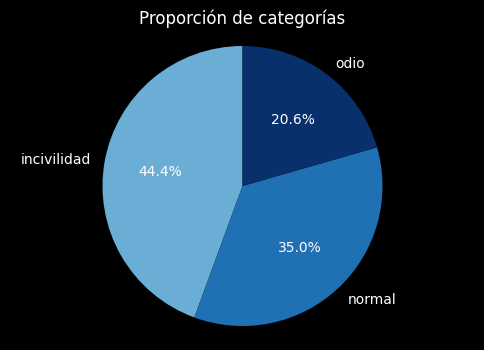

In [ ]:
# datos para gráfico de torta
labels = np.unique(train.clase)
sizes = train["clase"].value_counts().values

# subplots 1x1
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# colores
cmap=plt.cm.Blues
colors = [cmap(i) for i in np.linspace(0.5, 1, len(sizes))]

# plot
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')
ax.set_title('Proporción de categorías')
plt.show()

### Custom Features

En los bloques que siguen, se crean *features* personalizadas implementando transformers. Se generan dos clases, `CountTransformer1` y `CountTransformer2`. La primera hace un conteo de los signos de exclamación, interrogación, hashtags, arrobas, puntos suspensivos, palabras prolongadas, palabras con mayúscula, emojis de significancia negativa y positiva (dados por dos lexicones `emojis_neg` y `emojis_pos`, respectivamente) y número total de palabras para cada tweet. La segunda contabiliza jergas de connotación violenta, palabras de connotación negativa y palabras de sentido contextual positivo a partir de tres lexicones definidos manualmente: `lexicon_violent`, `lexicon_neg` y `lexicon_pos`. Ambas clases emplean los métodos `extract_features`, que recibe un documento y retorna una lista con los atributos mencionados en cada caso, y un método `transform`, que tiene como input un corpus y retorna un arreglo con las características de cada documento en él empleando `extract_features`.


#### Data Augmentation

In [ ]:
# errores a nivel de grafema
grapheme_spelling = augmentation.Spelling(method="grapheme_spelling",
                                    stopwords="default",
                                    aug_percent=0.3,
                                    tokenizer="default")

# errores a nivel de palabra
word_spelling = augmentation.Spelling(method="word_spelling",
                                    stopwords="default",
                                    aug_percent=0.3,
                                    tokenizer="default")

# pasar palabras a mayúscula
uppercase = augmentation.Spelling(method="uppercase",
                                    stopwords="default",
                                    aug_percent=0.05,
                                    tokenizer="default")

# eliminar puntuación
remove_punctuation = augmentation.Spelling(method="remove_punctuation",
                                    stopwords="default",
                                    aug_percent=0.5,
                                    tokenizer="default")


In [ ]:
aug_list = [word_spelling,uppercase,remove_punctuation]

for aug in aug_list:

  text_array = train['texto'].values
  text_list = list(text_array)

  train['texto'] = np.array(aug.augment(text_list))[:,0]

100%|██████████| 12214/12214 [00:00<00:00, 25050.97it/s]


#### Lexicones

In [ ]:
# lexicon de palabras negativas
lexicon_neg = pd.read_csv("https://raw.githubusercontent.com/kicorangel/RD-Lab/master/resources/Afffectivity/Spanish%20Opinion%20Lexicon/Palabras-Negativas.csv", sep="\t").values[:,0]

# lexicon de palabra positivas
lexicon_pos = pd.read_csv("https://raw.githubusercontent.com/kicorangel/RD-Lab/master/resources/Afffectivity/Spanish%20Opinion%20Lexicon/Palabras-Positivas.csv", sep="\t").values[:,0]

In [ ]:
# lexicon de emojis negativo
emojis_neg = ['👿','😐','😑','😒','😖','😠','😡',
              '😣','😤','😫','🙄','🤢','🤬','🤮',
              '🖕','💩','👎','🚫','🔫','🔪','💀',
              '😈', '🤡']

# lexicon de emojis positivo
emojis_pos = ['😀', '😄', '😊', '😃', '😍', '😘', '🤗',
              '😇', '🥳', '🎉', '🎈', '🎊', '🌟', '⭐',
              '🌞', '🌈', '💖', '💕', '💝', '👍', '👏',
              '🙌', '🎶', '🔥', '✨', '🍦', '🍭', '🍓',
              '🌺', '🌼', '🌻', '🌞', '🍀', '🍁', '🍂',
              '🍃', '🌱', '🌿', '🌍', '🌈', '🌈', '💪',
              '👌', '😎','❤']

In [ ]:
# lexicon de jergas violentas/insultos
lexicon_violent = ['csm','ctm','conchesumadre','concha de su madre','conchas de su madre','concha de tu madre','conchetumadre','conchetumare',
               'puta','puto','putas','putos','hijo de puta','hija de puta','puta','weon','weona','aweonao','aweona','imbecil',
               'estupido','estupida','gil','maricon','maricona','maraca','zorra','perra','culiao','culiado','culia',
               'culiada','qlia','qliao','qlo','qla','hueco','weko','perro','sapo','mato','muerete','pudrete','chucha',
               'anormal','infeliz','pichula','pixula','callampa','hijo de perra','hijos de perra','hija de perra',
               'mierda','mierdas','cresta','wea','weas','chupalo','chupenlo','reculiao','reql','ql', 'qlos','qlios','qlas','qlias',
               'tonto','tontos','borracho','borrachos','borracha','alocholica','alcoholico','enfermo','enferma','enfermos',
               'ignorante','ignorantes','tonta','degenerado','degenerada','degenerados','indios',
               'indio','india','retrasado','retrasada','comunista','comunistas','zurdo','facho','facha','zurdos','zurda',
               'fachos','morir','veneco','venecos','negro','negros','negra','cerdo','cerda','cerdos','cerdas','cochino','cochina','cochinos','cochinas',
               'gorreao','gorreado','cornudo','cornuda', 'hdp', 'wna', 'weco', 'pico', 'guaton', 'guatona', 'waton', 'watona', 'perkin', 'feminazi', 'cara de raja',
               'lacra', 'amariconado', 'colita', 'pelotudo', 'pelotuda']

#### Stopwords, lematizador y stemmer

In [ ]:
# lista de stopwords
stopwords = ['algun','alguna','algunas','alguno','algunos','ambos','ante','antes','aquel','un','una'
             'aquellas','aquellos','aqui','arriba','atras','bajo','bastante','bien','cada','cierta',
             'ciertas','cierto','ciertos','como','con','cual','cuando','dentro','desde','donde',
             'el','ella','ellas','ellos','en','encima','entonces','entre','era','eramos','eran','eras',
             'eres','es','esta','estaba','estaban','estamos','estan','estoy','fin','fue','fueron','fui',
             'fuimos','ha','hace','hacemos','hacen','hacer','haces','hago','incluso','ir','la','largo',
             'las','lo','los','mientras','mio','muchos','muy','nos','nosotros','otro','para','pero',
             'podeis','podemos','poder','podria','podriais','podriamos','podrian','podrias','por','por que',
             'q','que','porque','primero','puede','pueden','puedo','quien','sabe','sabeis','sabemos',
             'saben','saber','sabes','ser','es','si','siendo','sin','sobre','solamente','solo','sola','somos',
             'soy','su','sus','tambien','tenemos','tener','tengo','tiempo','tiene','tienen','todo','tras',
             'tuyo','ultimo','un','una','unas','uno','unos','usa','usamos','usan','usar','usas','uso','en',
             'va','valor','vamos','van','vaya','voy','yo','esta','estas','este','tu','de','y','o','e','ni']

In [ ]:
# lematizador
lemmatizer = preprocess.SpanishPreprocess(
        lower=True,
        remove_url=False,
        remove_hashtags=False,
        split_hashtags=False,
        normalize_breaklines=False,
        remove_emoticons=False,
        remove_emojis=False,
        convert_emoticons=False,
        convert_emojis=False,
        normalize_inclusive_language=True,
        reduce_spam=False,
        remove_vowels_accents=True,
        remove_multiple_spaces=False,
        remove_punctuation=False,
        remove_unprintable=False,
        remove_numbers=False,
        remove_stopwords=False,
        stopwords_list=None,
        lemmatize=True,
        stem=False,
        remove_html_tags=False,
)

# stemmer
stemmer = preprocess.SpanishPreprocess(
        lower=True,
        remove_url=False,
        remove_hashtags=False,
        split_hashtags=False,
        normalize_breaklines=False,
        remove_emoticons=False,
        remove_emojis=False,
        convert_emoticons=False,
        convert_emojis=False,
        normalize_inclusive_language=True,
        reduce_spam=False,
        remove_vowels_accents=True,
        remove_multiple_spaces=False,
        remove_punctuation=False,
        remove_unprintable=False,
        remove_numbers=False,
        remove_stopwords=False,
        stopwords_list=None,
        lemmatize=False,
        stem=True,
        remove_html_tags=False,
)

#### Preprocesamiento

In [ ]:
# preprocesador para el corpus
pps = preprocess.SpanishPreprocess(
        lower=True,
        remove_url=True,
        remove_hashtags=False,
        split_hashtags=True,
        normalize_breaklines=True,
        remove_emoticons=True,
        remove_emojis=True,
        convert_emoticons=False,
        convert_emojis=False,
        normalize_inclusive_language=True,
        reduce_spam=True,
        remove_vowels_accents=True,
        remove_multiple_spaces=True,
        remove_punctuation=True,
        remove_unprintable=True,
        remove_numbers=True,
        remove_stopwords=True,
        stopwords_list=list(stopwords),
        lemmatize=False,
        stem=True,
        remove_html_tags=True,
)

In [ ]:
# definir aplicación de preprocesamiento
apl = stemmer

# aplicar stemming a los lexicones
lexicon_violent = np.unique(apl.transform(' '.join(lexicon_violent)).split()) # para jergas violentas
lexicon_neg = np.unique(apl.transform(' '.join(lexicon_neg)).split()) # palabras negativas
lexicon_pos = np.unique(apl.transform(' '.join(lexicon_pos)).split()) # palabras positivas

# aplicar stemming a los stopwords
stopwords = np.unique(apl.transform(' '.join(stopwords)).split())

#### Clases CountTransformer

In [ ]:
class CountTransformer1(BaseEstimator, TransformerMixin):

  def extract_features(self, tweet):

    """
    Recibe un tweet y extrae los atributos de conteo de "!", "?", "#", "@", emojis neg., emojis pos.,
    palabras prolongadas, palabras en mayúscula, puntos suspensivos y largo de tweet

       input: self, tweet(string)
       output: list(float)
    """

    chars = ["!","?","#","@"] # chars de interés
    features = [] # inicializar lista de features

    for char in chars: # iterar en lista de chars

      count_ = tweet.count(char) # conteo de char en el tweet
      features.append(count_) # agregar a lista

    tweet_split = tweet.split()
    num_neg_emojis = np.intersect1d(emojis_neg, tweet_split).shape[0] # conteo de nro. de emojis neg
    num_pos_emojis = np.intersect1d(emojis_pos, tweet_split).shape[0] # conteo de nro. de emojis pos

    num_prolonged = len(re.findall(r'\b\w*(\w)\1{2,}\w*\b',tweet)) # conteo de palabras prolongadas, p. ej. fiaaaaaaaaaaaum
    num_caps = len(re.findall(r'\b[A-Z]+\b', tweet)) # conteo de palabras en mayúscula
    num_dots = len(re.findall(r'\.{3,}', tweet)) # conteo de puntos suspensivos (..., ...., ....., etc.)

    tweet_length = len(tweet.split()) # largo del tweet en cuanto a palabras

    features = features + [num_neg_emojis,num_pos_emojis,num_prolonged,num_caps, num_dots, tweet_length]

    return features

  def transform(self, X, y=None):
    """
    Recibe un corpus con tweets y extrae los mismos atributos que extract_features

       input: self, X(array(string))
       output: array(array(float))
    """

    features_ = [] # inicializar lista

    for tweet in X: # para cada tweet ...
      features_.append(self.extract_features(tweet)) # extraer atributos y agregar a lista

    return np.array(features_)

  def fit(self, X, y=None):

    return self

In [ ]:
class CountTransformer2(BaseEstimator, TransformerMixin):

  def __init__(self):
    super().__init__()
    self.pps = pps # dejar preprocesador de texto 'pps' como atributo

  def extract_features(self, tweet):
    """
    Recibe un tweet y extrae los atributos de conteo de palabras negativas, positivas y frases violentas o insultos

       input: self, tweet(string)
       output: list(float)
    """

    new_tweet = self.pps.transform(tweet, debug=False) # tweet aplicandole transformación de pps
    new_tweet_split = np.array(new_tweet.split()) # convertir tweet en array

    violent_word_count = np.intersect1d(new_tweet_split,lexicon_violent).shape[0] # intersectar con insultos y calcular largo tamaño de intersec.
    negative_word_count = np.intersect1d(new_tweet_split,lexicon_neg).shape[0] # intersectar con palabras negativas y calcular tamaño de intersec.
    positive_word_count = np.intersect1d(new_tweet_split,lexicon_pos).shape[0] # intersectar con palabras positivas y calcular tamaño de intersec.

    return [positive_word_count,negative_word_count,violent_word_count] # retornar lista con features

  def transform(self, X, y=None):
    """
    Recibe un corpus con tweets y extrae los mismos atributos que extract_features

       input: self, X(array(string))
       output: array(array(float))
    """

    features_ = [] # inicializar lista

    for tweet in X: # para cada tweet ...
      features_.append(self.extract_features(tweet)) # extraer atributos y agregar a lista

    return np.array(features_)

  def fit(self, X, y=None):

    return self

In [ ]:
# testeo de ejecución de los transformer
sample = train["texto"]
sample_features_1 = CountTransformer1().transform(sample)
sample_features_2 = CountTransformer2().transform(sample)

In [ ]:
num_random = np.random.randint(train.shape[0]) # número al azar en el rango de largo del corpus

# Se puede verificar que el conteo de símbolos es consistente con el transformer creado.
print(f"Textos originales: {sample.iloc[num_random]}")
print(f"Features creados para transformer 1: {sample_features_1[num_random]}")
print(f"Features creados para transformer 2: {sample_features_2[num_random]}")

Textos originales: @USER   SE NOS ESCONDIO LA FLAMANTE ALCALDESA DE VIÑA !!!   LES METIO EL MEDIO PICO EN EL OJO AHORA NADDIE SABE DONDE ESTA ???? #ContigoCHV
Features creados para transformer 1: [ 3  4  1  1  0  0  0 21  0 25]
Features creados para transformer 2: [1 1 0]


### Definición de la representación y clasificador

En los siguientes bloques se define el *pipeline* a utilizar. La idea general es contabilizar los chars, palabras de interés y otros atributos manuales en los datos originales aplicando `CountTransform1` y `CountTransform2`, luego generar los 5,6-gramas con los datos preprocesados (aplicando stemming, eliminando arrobas, stopwords, haciendo split de hashtags, pasando texto a minúscula, eliminando tildes, números, links, emojis, etc.), y unir las tres colecciones de features producidas para posteriormente entrenar un clasificador (`RandomForest` o `XGBoost`). Así, se tiene un esquema de pipelines anidados, definidos según:


```python
    Pipeline(
      [
        ('feature_union',
        FeatureUnion(
          [
            ('char_num', CountTransformer1()),
            ('lexicon_num', CountTransformer2()),
            ('vectorizer',
            Pipeline(
              [
                ('pps', pps_),
                ('ngram', CountVectorizer(analyzer='char_wb',ngram_range=(5,6)))
              ]
            )
          )
        ]
      )
    ),
        ("clf",clf)
      ]
    )
```


In [ ]:
# modelo de xgboost
xgb_model = xgb.XGBClassifier(objective='multi:softmax',
                              num_class=3, # num de clases = 3 (odio, inciv, normal)
                              booster='gbtree',
                              tree_method='auto',
                              n_jobs=1,
                              max_delta_step=0,
                              random_state=42,
                              verbosity=1,
                              eval_metric='logloss')

In [ ]:
# Clasificadores
clfs = [RandomForestClassifier(random_state=42), xgb_model]

In [ ]:
def get_experiment_0_pipeline(clf):
  """
  Recibe un clasificador y retorna un Pipeline para features manuales + vectorizador

     input: sklearn classifier
     output: sklearn.pipeline.Pipeline
  """

  pps_vectorized = np.vectorize(lambda x: pps.transform(x,debug=False)) # vectorizar transformación de preprocesamiento
  pps_ = FunctionTransformer(pps_vectorized) # pasar aplicación como transformación

  vectorizer_pipeline = Pipeline([
      ('pps', pps_),
      ('ngram', CountVectorizer(analyzer='char_wb',ngram_range=(5,6)))
      ]) # pipeline para 5,6-gramas a nivel de caracteres (sin padding)

  union = FeatureUnion([ # union de features
          ('char_num', CountTransformer1()), # !, ?, #, @, ..., palabras prolongadas, mayusculas, largo de tweet, emojis
          ('lexicon_num', CountTransformer2()), # jergas violentas, palabras positivas y negativas
          ('vectorizer', vectorizer_pipeline) # pipeline para 5,6-gramas anidado
          ])

  pipeline =  Pipeline([
      ('feature_union', union), # union de features
      ("clf",clf) # clasificador
      ])

  return pipeline

En los dos bloques siguientes, se definen dos experimentos adicionales: `get_experiment_1_pipeline`, el que, para un vectorizador y clasificador dados, genera un modelo sin considerar los atributos personalizados según `CountTransformer1` y `CountTransformer2`; y `get_experiment_2_pipeline`, que incorpora los transformers, pero aplica otro método de vectorización.

In [ ]:
def get_experiment_1_pipeline(clf,vectorizer):
  """
  Recibe un clasificador y retorna un Pipeline para features dadas por un vectorizador

     input: sklearn classifier
     output: sklearn.pipeline.Pipeline
  """

  pps_vectorized = np.vectorize(lambda x: pps.transform(x,debug=False)) # vectorizar transformación de preprocesamiento
  pps_ = FunctionTransformer(pps_vectorized) # pasar aplicación como transformación

  vectorizer_pipeline = Pipeline([
      ('pps', pps_),
      ('ngram', vectorizer)
      ])

  pipeline =  Pipeline([
      ('vectorizer', vectorizer_pipeline), # pipeline de clasificación
      ("clf",clf) # clasificador
      ])

  return pipeline

In [ ]:
def get_experiment_2_pipeline(clf, vectorizer):
  """
  Recibe un clasificador y retorna un Pipeline para features manuales + vectorizador

     input: sklearn classifier
     output: sklearn.pipeline.Pipeline
  """

  pps_vectorized = np.vectorize(lambda x: pps.transform(x,debug=False)) # vectorizar transformación de preprocesamiento
  pps_ = FunctionTransformer(pps_vectorized) # pasar aplicación como transformación

  vectorizer_pipeline = Pipeline([
      ('pps', pps_),
      ('ngram', vectorizer)
      ]) # pipeline para 5,6-gramas a nivel de caracteres (sin padding)

  union = FeatureUnion([ # union de features
          ('char_num', CountTransformer1()), # !, ?, #, @, ..., palabras prolongadas, mayusculas, largo de tweet, emojis
          ('lexicon_num', CountTransformer2()), # jergas violentas, palabras positivas y negativas
          ('vectorizer', vectorizer_pipeline) # pipeline para 5,6-gramas anidado
          ])

  pipeline =  Pipeline([
      ('feature_union', union), # union de features
      ("clf",clf) # clasificador
      ])

  return pipeline

### Ejecutar el pipeline para experimento número 0

Aquí, se trabaja con el pipeline propuesto con atributos determinados manualmente y en conjunto con el esquema de 5,6-gramas a nivel de caracteres. Se presentan matrices de confusión para los clasificadores de bosques aleatorios y XGBoost con muestras de entrenamiento estratificadas del $67\%$ y validación del $33\%$, y también los resultados de clasificación para validación cruzada de 5 iteraciones (también estratificada) según cada modelo.


In [ ]:
def run(dataset, pipeline):
    """
    Crea el pipeline y luego lo ejecuta sobre un dataset.
    Retorna el modelo ya entrenado con sus labels asociadas y los scores obtenidos al evaluarlo.

       input: array(array(id,str,str)), sklearn.pipeline.Pipeline
       output: sklearn.pipeline.Pipeline, array(str), array(float)
    """

    # Dividimos el dataset en train y test, aún no se transforma de Strings a valores numéricos.
    X_train, X_test, y_train, y_test = train_test_split(
        dataset.texto,
        dataset.clase,
        shuffle=True,
        test_size=0.33,
        random_state=42,
        stratify=dataset.clase # estratificar muestra según clases
    )

    print(f"# Datos de entrenamiento en dataset: {len(X_train)}")
    print(f"# Datos de testing en dataset: {len(X_test)}")

    # Entrenamos el clasificador (Ejecuta el entrenamiento sobre todo el pipeline).
    # En este caso el Bag of Words es el encargado de transformar de Strings a vectores numéricos.
    pipeline.fit(X_train, y_train)

    # Predecimos las probabilidades de intensidad de cada elemento del set de prueba.
    predicted_probabilities = pipeline.predict_proba(X_test)

    # Obtenemos el orden de las clases aprendidas.
    learned_labels = pipeline.classes_

    # Evaluamos:
    scores = evaluate(predicted_probabilities, y_test, learned_labels)

    predicted_labels = [learned_labels[np.argmax(item)] for item in predicted_probabilities]
    matriz_confusion =  confusion_matrix(y_test, predicted_labels, labels=["normal", "odio", "incivilidad"])

    return pipeline, learned_labels, scores, matriz_confusion

In [ ]:
def StratifiedCrossVal(X, y, pipeline, fold_size=5, random_state=42):
  """
  Realiza validación cruzada para un pipeline específico.

     input: array, array, pipeline, int, int
     output: array(array(float,float,flot)), array(float)
  """

  skf = StratifiedKFold(n_splits=fold_size, shuffle=True, random_state=random_state) # fold estratificado
  lst_accu_stratified = [] # lista de puntajes (AUC, kappa y acc)

  y_ = y.replace(['incivilidad', 'odio', 'normal'],[0,1,2], inplace=False) # pasa datos categóricos a numéricos para hacer el split

  for train_index, test_index in skf.split(X.values, y_.values):

    # separar data en entrenamiento y validación
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y.values[train_index], y.values[test_index]
    pipeline.fit(X_train_fold, y_train_fold) # fit

    predicted_probabilities = pipeline.predict_proba(X_test_fold) # predict proba
    learned_labels = pipeline.classes_ # etiquetas aprendidas
    scores = evaluate(predicted_probabilities, y_test_fold, learned_labels) # puntajes

    lst_accu_stratified.append(scores) # agregar triplete de puntajes

  return np.array(lst_accu_stratified), np.array(lst_accu_stratified).mean(axis=0)

In [ ]:
def plot_confusion_matrix(cm, labels, title='Matriz de confusion', cmap=plt.cm.Blues):
    """
    Grafica una matriz de confusión de k x k con normalización porcentual.

       input: array(array(float, ... , float)), list(str), str, cmap
       output: None

    Creación de función asistida con ChatGPT
    """

    fig, ax = plt.subplots(1, 1, figsize=(4, 4))

    size = cm.sum()

    ax.imshow(cm, interpolation='nearest', cmap=cmap) # colormap
    ax.set_title(title) # titulo

    tick_marks = np.arange(len(labels))
    ax.set_xticks(tick_marks, labels, rotation=45)
    ax.set_yticks(tick_marks, labels)

    fmt = '.2f'
    thresh = cm.max()/2.
    for i, j in np.ndindex(cm.shape): # para cada entrada de la matriz
        ax.text(j, i, format(cm[i, j]/size*100, fmt)+'%', # calcular normalización y pasar a texto
                 horizontalalignment="center", # alinear
                 color="white" if cm[i, j] > thresh else 'black') # fijar umbral para asignación de color

    ax.set_ylabel('real')
    ax.set_xlabel('predicción')

### Ejecutar el sistema creado por cada train set


In [ ]:
# Creamos el pipeline
pipeline_rf = get_experiment_0_pipeline(RandomForestClassifier(random_state=42)) # utilizar random forest

# Ejecutamos el pipeline sobre el dataset y guardamos el clasificador, las labels aprendidas y los scores obtenidos
classifier_rf, learned_labels_rf, scores_rf, matriz_rf = run(train, pipeline_rf)

# Imprimimos las métricas en el conjunto de testing
print(f"AUC: {scores_rf[0]}")
print(f"Kappa: {scores_rf[1]}")
print(f"Accuracy: {scores_rf[2]}")

# Datos de entrenamiento en dataset: 8183
# Datos de testing en dataset: 4031
Matriz de confusión
[[1170  103  140]
 [ 190  507  131]
 [ 242   37 1511]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.73      0.83      0.78      1413
        odio       0.78      0.61      0.69       828
 incivilidad       0.85      0.84      0.85      1790

    accuracy                           0.79      4031
   macro avg       0.79      0.76      0.77      4031
weighted avg       0.79      0.79      0.79      4031

Métricas:

AUC:  0.914	Kappa: 0.669	Accuracy: 0.791
------------------------------------------------------

AUC: 0.914
Kappa: 0.669
Accuracy: 0.791


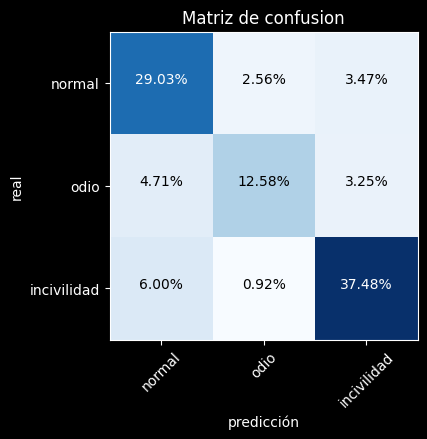

In [ ]:
# Matriz de confusión
plot_confusion_matrix(matriz_rf, labels=['normal','odio','incivilidad'], title='Matriz de confusion')

In [ ]:
# Resultados y reporte
cv_results_rf = StratifiedCrossVal(train['texto'], train['clase'], get_experiment_0_pipeline(RandomForestClassifier(random_state=42)), fold_size=5, random_state=42)

Matriz de confusión
[[681  45 130]
 [115 301  86]
 [160  17 908]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.71      0.80      0.75       856
        odio       0.83      0.60      0.70       502
 incivilidad       0.81      0.84      0.82      1085

    accuracy                           0.77      2443
   macro avg       0.78      0.74      0.76      2443
weighted avg       0.78      0.77      0.77      2443

Métricas:

AUC:  0.906	Kappa: 0.64	Accuracy: 0.774
------------------------------------------------------

Matriz de confusión
[[709  51  96]
 [118 307  77]
 [155  17 913]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.72      0.83      0.77       856
        odio       0.82      0.61      0.70       502
 incivilidad       0.84      0.84      0.84      1085

    accuracy                           0.79      2443
   macro avg       0.79      0.76      0.77      244

In [ ]:
def run_numerical(dataset, pipeline):
    """
    Hace lo mismo que run, pero pasando las etiquetas de categóricas a numéricas.

       input: array(array(id,str,str)), sklearn.pipeline.Pipeline
       output: sklearn.pipeline.Pipeline, array(str), array(float)
    """

    # Conjuntos de entrenamiento y testeo
    X_train, X_test, y_train, y_test = train_test_split(
        dataset.texto,
        dataset.clase,
        shuffle=True,
        test_size=0.33,
        random_state=42,
        stratify=dataset.clase
    )

    data_labels = np.unique(dataset.clase) # etiquetas de clase
    range_list = [i for i in range(len(data_labels))] # lista para renombramientos

    y_train_=y_train.replace(data_labels,range_list) # convertir a numérico

    print(f"# Datos de entrenamiento en dataset: {len(X_train)}")
    print(f"# Datos de testing en dataset: {len(X_test)}")

    pipeline.fit(X_train, y_train_)

    predicted_probabilities = pipeline.predict_proba(X_test)
    learned_labels = pd.Series(pipeline.classes_).replace(range_list,data_labels).values # pasar las etiquetas al formato inicial

    predicted_labels = [learned_labels[np.argmax(item)] for item in predicted_probabilities]
    matriz_confusion =  confusion_matrix(y_test, predicted_labels, labels=["normal", "odio", "incivilidad"])

    scores = evaluate(predicted_probabilities, y_test, learned_labels)

    return pipeline, learned_labels, scores, matriz_confusion

def StratifiedCrossVal_numerical(X, y, pipeline, fold_size=5, random_state=42):
  """
  Hace lo mismo que StratifiedCrossVal, pero pasando las etiquetas de categóricas a numéricas.

     input: array, array, pipeline, int, int
     output: array(array(float,float,flot)), array(float)
  """

  skf = StratifiedKFold(n_splits=fold_size, shuffle=True, random_state=random_state) # stratify fold
  lst_accu_stratified = [] # list of accuracy scores

  # replacing values
  y_ = y.replace(['incivilidad', 'odio', 'normal'],[0,1,2], inplace=False)

  for train_index, test_index in skf.split(X.values, y_.values):

    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y_.values[train_index], y.values[test_index]
    pipeline.fit(X_train_fold, y_train_fold) # fit classifier

    predicted_probabilities = pipeline.predict_proba(X_test_fold)
    learned_labels = pd.Series(pipeline.classes_).replace([0,1,2],['incivilidad','odio','normal']).values

    scores = evaluate(predicted_probabilities, y_test_fold, learned_labels)

    lst_accu_stratified.append(scores) # add score

  return np.array(lst_accu_stratified), np.array(lst_accu_stratified).mean(axis=0)

In [ ]:
pipeline_xgb = get_experiment_0_pipeline(xgb_model) # pipeline con XGBoost como clasificador

classifier_xgb, learned_labels_xgb, scores_xgb, matriz_xgb = run_numerical(train, pipeline_xgb)

print(f"AUC: {scores_xgb[0]}")
print(f"Kappa: {scores_xgb[1]}")
print(f"Accuracy: {scores_xgb[2]}")

# Datos de entrenamiento en dataset: 8183
# Datos de testing en dataset: 4031
Matriz de confusión
[[1178   88  147]
 [ 157  552  119]
 [ 204   51 1535]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.77      0.83      0.80      1413
        odio       0.80      0.67      0.73       828
 incivilidad       0.85      0.86      0.85      1790

    accuracy                           0.81      4031
   macro avg       0.81      0.79      0.79      4031
weighted avg       0.81      0.81      0.81      4031

Métricas:

AUC:  0.928	Kappa: 0.7	Accuracy: 0.81
------------------------------------------------------

AUC: 0.928
Kappa: 0.7
Accuracy: 0.81


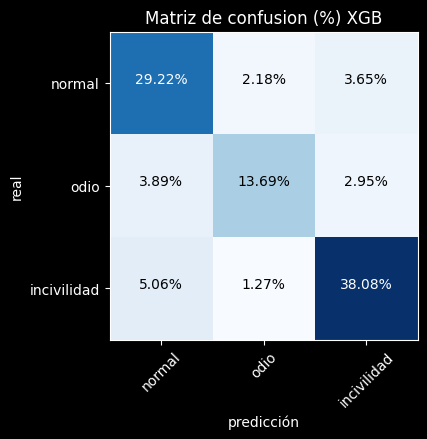

In [ ]:
# Matriz de confusión
plot_confusion_matrix(matriz_xgb, ['normal','odio','incivilidad'], title='Matriz de confusion (%) XGB')

In [ ]:
# Resultados y reporte
cv_results_xgb = StratifiedCrossVal_numerical(train['texto'], train['clase'], get_experiment_0_pipeline(xgb.XGBClassifier(objective='multi:softmax',
                              num_class=3, # num de clases = 3 (odio, inciv, normal)
                              booster='gbtree',
                              tree_method='auto',
                              n_jobs=1,
                              max_delta_step=0,
                              random_state=42,
                              verbosity=1,
                              eval_metric='logloss')), fold_size=5, random_state=42)

Matriz de confusión
[[688  41 127]
 [102 327  73]
 [122  28 935]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.75      0.80      0.78       856
        odio       0.83      0.65      0.73       502
 incivilidad       0.82      0.86      0.84      1085

    accuracy                           0.80      2443
   macro avg       0.80      0.77      0.78      2443
weighted avg       0.80      0.80      0.80      2443

Métricas:

AUC:  0.923	Kappa: 0.679	Accuracy: 0.798
------------------------------------------------------

Matriz de confusión
[[719  41  96]
 [113 326  63]
 [129  21 935]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.75      0.84      0.79       856
        odio       0.84      0.65      0.73       502
 incivilidad       0.85      0.86      0.86      1085

    accuracy                           0.81      2443
   macro avg       0.81      0.78      0.79      24

### *Agreement* entre clasificadores

En los bloques de código que siguen, se calcula el acuerdo entre dos clasificadores entrenados bajo el mismo set de datos para la predicción de las etiquetas de cada documento, considerando adicionalmente su *agreement* a nivel de clase (incivilidad, odio, normal).

In [ ]:
def agreement(X, y, clf_list, labels_list):
  """
  Calcula los acuerdos porcentuales en predicción entre dos modelos y un set de datos de prueba

  input: array(str), array(str), clf, clf, list(str,str,str), list(str,str,str)
  output: array(array(float, float, float, float))
  """

  gold = y.values

  size = y.size # tamaño de muestra
  agree_list = [] # inicializar lista de acuerdos

  class_list = [] # lista de clases predichas

  for i in range(len(clf_list)): # generar predicciones y agregar a lista
     predicted = pd.DataFrame(clf_list[i].predict_proba(X), columns=labels_list[i]).idxmax(axis=1).values
     class_list.append(predicted)

  agree, agree_inc, agree_hate, agree_normal = True, True, True, True

  for i in range(len(class_list)-1): # calcular agreement entre todos los modelos

    pred_class_1, pred_class_2 = class_list[i], class_list[i+1] # par de clases predichas

    agree = np.logical_and(agree, pred_class_1 == pred_class_2)

    agree_inc = np.logical_and(agree_inc, np.logical_and((pred_class_1=='incivilidad'),(pred_class_2=='incivilidad'))) # agreement por etiqueta
    agree_hate = np.logical_and(agree_hate,np.logical_and((pred_class_1=='odio'),(pred_class_2=='odio')))
    agree_normal = np.logical_and(agree_normal,np.logical_and((pred_class_1=='normal'),(pred_class_2=='normal')))

  agree, agree_inc, agree_hate, agree_normal = agree.sum()/size, agree_inc.sum()/size, agree_hate.sum()/size, agree_normal.sum()/size
  agree_list.append([agree_inc,agree_hate,agree_normal,agree])

  for i in range(len(class_list)): # comparar con etiquetas gold

    pred_class = class_list[i]

    agree = np.logical_and(agree, pred_class == gold).sum()/size

    agree_inc = np.logical_and((pred_class=='incivilidad'),(gold=='incivilidad')).sum()/size # agreement por etiqueta
    agree_hate = np.logical_and((pred_class=='odio'),(gold=='odio')).sum()/size
    agree_normal = np.logical_and((pred_class=='normal'),(gold=='normal')).sum()/size

    agree_list.append([agree_inc,agree_hate,agree_normal,agree]) # agregar 4-tupla con porcentajes de acuerdo

  return 100*np.array(agree_list)

In [ ]:
# split train/test
_ , X_test_ag, __, y_test_ag = train_test_split(
        train.texto,
        train.clase,
        shuffle=True,
        test_size=0.33,
        random_state=42,
        stratify=train.clase)

In [ ]:
agree_array_test = agreement(X_test_ag, y_test_ag, [classifier_rf, classifier_xgb], [learned_labels_rf, learned_labels_xgb])
agree_array_test

array([[41.05680972, 13.84271893, 34.38352766, 89.28305631],
       [37.48449516, 12.57752419, 29.02505582, 79.08707517],
       [38.07988092, 13.69387249, 29.22351774, 80.99727115]])

In [ ]:
agree_array_target = agreement(target.texto, target.clase, [classifier_rf, classifier_xgb], [learned_labels_rf, learned_labels_xgb])
agree_array_target

array([[40.43876883, 13.03208906, 35.3962017 , 88.86705959],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

### Predecir los target set y crear la submission

Aquí predecimos los target set usando los clasificadores creados y creamos los archivos de las submissions.


In [ ]:
def predict_target(dataset, classifier, labels):
  # Predecir las probabilidades de intensidad de cada elemento del target set.
  predicted = pd.DataFrame(
      classifier.predict_proba(dataset.texto), columns=labels
      )

  # Agregar ids
  predicted["id"] = dataset.id.values
  # Reordenar las columnas
  predicted = predicted[["id", "normal", "odio", "incivilidad"]]
  return predicted

In [ ]:
predicted_target = {}

# Crear carpeta ./predictions
if not os.path.exists("./predictions"):
    os.mkdir("./predictions")

else:
    # Eliminar predicciones anteriores:
    shutil.rmtree("./predictions")
    os.mkdir("./predictions")


# Predecir
predicted_target = predict_target(target, classifier_xgb, learned_labels_xgb)

# Guardar predicciones en archivos separados.
predicted_target.to_csv(
    "./predictions/prediction.txt", sep="\t", header=False, index=False
)

# Crear archivo zip
a = shutil.make_archive("predictions", "zip", "./predictions")


In [ ]:
target

,id,texto,clase
0,3236,@user Chúpame el pico,NaN
1,8185,Marico que ansiedad cuando veo un tweet de Tin...,NaN
2,4804,Yapo weones es solo Melipilla.,NaN
3,12112,@user callate fecal de las manos negras del Sa...,NaN
4,2721,@user Jajajajaja justamente. Otra llegada de a...,NaN
...,...,...,...
3049,8720,"La concha de tu madre, qué nervioso me tienes",NaN
3050,4727,Todos los weones más nefastos han dicho que va...,NaN
3051,11166,Feminazis locas qlas enfermas nentales webiand...,NaN
3052,9433,"Como celebran estos muertos culiaos, si no han...",NaN


In [ ]:
predicted_target

,id,normal,odio,incivilidad
0,3236,0.077045,0.084938,0.838017
1,8185,0.525782,0.156624,0.317595
2,4804,0.008074,0.036446,0.955480
3,12112,0.682539,0.126209,0.191253
4,2721,0.836030,0.081760,0.082210
...,...,...,...,...
3049,8720,0.123452,0.113649,0.762899
3050,4727,0.002264,0.007052,0.990685
3051,11166,0.001219,0.986890,0.011891
3052,9433,0.023714,0.099703,0.876583


In [ ]:
X_target = target.set_index("id")[["texto"]] # textos de target
predicted_df = pd.DataFrame(predicted_target.set_index("id").idxmax(axis=1), columns=['clase']) # clases predecidas
X_target = X_target.join(predicted_df) # join

X_target.sample(10)

,texto,clase
id,,
13308,Punto 6 del Manifiesto Charolastra: Puto el qu...,normal
3782,@user @user @user Jajajajajaja bellolio el pay...,incivilidad
14719,@user @user NO SOLO A ELLE LA DISCRIMINA ESE S...,odio
14604,@user Yo lo daria daría a préstamo para que se...,normal
8911,CUANDO DIJE QUE SI A TRABAJAR HOY NO ME REFERI...,incivilidad
9950,"@user @user El clasismo como ""argumento"" es b...",incivilidad
8270,@user El domingo le ponemos la ultima pala de ...,incivilidad
13304,Roger no agarra una puta madreeeee,incivilidad
9323,ALARCÓN MALO CULIAO #VamosColoColo,incivilidad


### Ejecutar pipeline para experimento número 1

En los bloques de más abajo, se ejecuta validación cruzada de 5 iteraciones estratificada, solo considerando los features dados por el modelo de 5,6-gramas a nivel de letra. Se emplean los clasificadores de bosques aleatorios y XGBoost.

In [ ]:
# Creamos el pipeline
pipeline_rf_1 = get_experiment_1_pipeline(RandomForestClassifier(random_state=42),CountVectorizer(analyzer='char_wb',ngram_range=(5,6))) # utilizar random forest

classifier_rf_1, learned_labels_rf_1, scores_rf_1, matriz_rf_1 = run_numerical(train, pipeline_rf_1)

# Datos de entrenamiento en dataset: 8183
# Datos de testing en dataset: 4031
Matriz de confusión
[[1143  104  166]
 [ 199  512  117]
 [ 267   34 1489]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.71      0.81      0.76      1413
        odio       0.79      0.62      0.69       828
 incivilidad       0.84      0.83      0.84      1790

    accuracy                           0.78      4031
   macro avg       0.78      0.75      0.76      4031
weighted avg       0.78      0.78      0.78      4031

Métricas:

AUC:  0.906	Kappa: 0.652	Accuracy: 0.78
------------------------------------------------------



In [ ]:
# Resultados y reporte
cv_results_rf_1 = StratifiedCrossVal(train['texto'], train['clase'],
                                     get_experiment_1_pipeline(RandomForestClassifier(random_state=42),CountVectorizer(analyzer='char_wb',ngram_range=(5,6))),
                                     fold_size=5, random_state=42)

Matriz de confusión
[[688  48 120]
 [120 301  81]
 [170  22 893]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.70      0.80      0.75       856
        odio       0.81      0.60      0.69       502
 incivilidad       0.82      0.82      0.82      1085

    accuracy                           0.77      2443
   macro avg       0.78      0.74      0.75      2443
weighted avg       0.78      0.77      0.77      2443

Métricas:

AUC:  0.9	Kappa: 0.635	Accuracy: 0.77
------------------------------------------------------

Matriz de confusión
[[683  55 118]
 [117 317  68]
 [161  21 903]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.71      0.80      0.75       856
        odio       0.81      0.63      0.71       502
 incivilidad       0.83      0.83      0.83      1085

    accuracy                           0.78      2443
   macro avg       0.78      0.75      0.76      2443


In [ ]:
pipeline_xgb_1 = get_experiment_1_pipeline(xgb.XGBClassifier(objective='multi:softmax',
                              num_class=3, # num de clases = 3 (odio, inciv, normal)
                              booster='gbtree',
                              tree_method='auto',
                              n_jobs=1,
                              max_delta_step=0,
                              random_state=42,
                              verbosity=1,
                              eval_metric='logloss'),CountVectorizer(analyzer='char_wb',ngram_range=(5,6))) # pipeline con XGBoost como clasificador

classifier_xgb_1, learned_labels_xgb_1, scores_xgb_1, matriz_xgb_1 = run_numerical(train, pipeline_xgb_1)

# Datos de entrenamiento en dataset: 8183
# Datos de testing en dataset: 4031
Matriz de confusión
[[1185   95  133]
 [ 174  552  102]
 [ 237   42 1511]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.74      0.84      0.79      1413
        odio       0.80      0.67      0.73       828
 incivilidad       0.87      0.84      0.85      1790

    accuracy                           0.81      4031
   macro avg       0.80      0.78      0.79      4031
weighted avg       0.81      0.81      0.81      4031

Métricas:

AUC:  0.924	Kappa: 0.694	Accuracy: 0.806
------------------------------------------------------



In [ ]:
# Resultados y reporte
cv_results_xgb_1 = StratifiedCrossVal_numerical(train['texto'], train['clase'],
                                                get_experiment_1_pipeline(xgb.XGBClassifier(objective='multi:softmax',
                                                                                            num_class=3,
                                                                                            booster='gbtree',
                                                                                            tree_method='auto',
                                                                                            n_jobs=1,
                                                                                            max_delta_step=0,
                                                                                            random_state=42,
                                                                                            verbosity=1,
                                                                                            eval_metric='logloss'),
                                                                          CountVectorizer(analyzer='char_wb',ngram_range=(5,6))) ,
                                                 fold_size=5, random_state=42)

Matriz de confusión
[[706  44 106]
 [107 331  64]
 [140  29 916]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.74      0.82      0.78       856
        odio       0.82      0.66      0.73       502
 incivilidad       0.84      0.84      0.84      1085

    accuracy                           0.80      2443
   macro avg       0.80      0.78      0.79      2443
weighted avg       0.80      0.80      0.80      2443

Métricas:

AUC:  0.918	Kappa: 0.683	Accuracy: 0.799
------------------------------------------------------

Matriz de confusión
[[722  51  83]
 [114 335  53]
 [145  27 913]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.74      0.84      0.79       856
        odio       0.81      0.67      0.73       502
 incivilidad       0.87      0.84      0.86      1085

    accuracy                           0.81      2443
   macro avg       0.81      0.78      0.79      24

### Ejecutar pipeline para experimento número 2

In [ ]:
# Creamos el pipeline
pipeline_xgb_2_1 = get_experiment_2_pipeline(xgb.XGBClassifier(objective='multi:softmax',
                              num_class=3, # num de clases = 3 (odio, inciv, normal)
                              booster='gbtree',
                              tree_method='auto',
                              n_jobs=1,
                              max_delta_step=0,
                              random_state=42,
                              verbosity=1,
                              eval_metric='logloss'),
                              CountVectorizer()) # utilizar bow

classifier_xgb_2_1, learned_labels_xgb_2_1, scores_xgb_2_1, matriz_xgb_2_1 = run_numerical(train, pipeline_xgb_2_1)

# Datos de entrenamiento en dataset: 8183
# Datos de testing en dataset: 4031
Matriz de confusión
[[1192   80  141]
 [ 171  540  117]
 [ 205   52 1533]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.76      0.84      0.80      1413
        odio       0.80      0.65      0.72       828
 incivilidad       0.86      0.86      0.86      1790

    accuracy                           0.81      4031
   macro avg       0.81      0.78      0.79      4031
weighted avg       0.81      0.81      0.81      4031

Métricas:

AUC:  0.926	Kappa: 0.699	Accuracy: 0.81
------------------------------------------------------



In [ ]:
# Resultados y reporte
cv_results_xgb_2_1 = StratifiedCrossVal_numerical(train['texto'], train['clase'],
                                                  get_experiment_2_pipeline(xgb.XGBClassifier(objective='multi:softmax',
                                                                                              num_class=3,
                                                                                              booster='gbtree',
                                                                                              tree_method='auto',
                                                                                              n_jobs=1,
                                                                                              max_delta_step=0,
                                                                                              random_state=42,
                                                                                              verbosity=1,
                                                                                              eval_metric='logloss'),
                                                                            CountVectorizer()),
                                                  fold_size=5, random_state=42)

Matriz de confusión
[[695  39 122]
 [101 326  75]
 [134  24 927]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.75      0.81      0.78       856
        odio       0.84      0.65      0.73       502
 incivilidad       0.82      0.85      0.84      1085

    accuracy                           0.80      2443
   macro avg       0.80      0.77      0.78      2443
weighted avg       0.80      0.80      0.80      2443

Métricas:

AUC:  0.919	Kappa: 0.678	Accuracy: 0.797
------------------------------------------------------

Matriz de confusión
[[721  42  93]
 [114 318  70]
 [139  18 928]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.74      0.84      0.79       856
        odio       0.84      0.63      0.72       502
 incivilidad       0.85      0.86      0.85      1085

    accuracy                           0.81      2443
   macro avg       0.81      0.78      0.79      24

In [ ]:
# Creamos el pipeline
pipeline_xgb_2_2 = get_experiment_2_pipeline(xgb.XGBClassifier(objective='multi:softmax',
                              num_class=3, # num de clases = 3 (odio, inciv, normal)
                              booster='gbtree',
                              tree_method='auto',
                              n_jobs=1,
                              max_delta_step=0,
                              random_state=42,
                              verbosity=1,
                              eval_metric='logloss'),
                              CountVectorizer(analyzer='char_wb',ngram_range=(5,5))) # utilizar solo 5-gramas

classifier_xgb_2_2, learned_labels_xgb_2_2, scores_xgb_2_2, matriz_xgb_2_2 = run_numerical(train, pipeline_xgb_2_2)

# Datos de entrenamiento en dataset: 8183
# Datos de testing en dataset: 4031
Matriz de confusión
[[1171   95  147]
 [ 157  557  114]
 [ 209   50 1531]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.76      0.83      0.79      1413
        odio       0.79      0.67      0.73       828
 incivilidad       0.85      0.86      0.85      1790

    accuracy                           0.81      4031
   macro avg       0.80      0.79      0.79      4031
weighted avg       0.81      0.81      0.81      4031

Métricas:

AUC:  0.928	Kappa: 0.698	Accuracy: 0.808
------------------------------------------------------



In [ ]:
# Resultados y reporte
cv_results_xgb_2_2 = StratifiedCrossVal_numerical(train['texto'], train['clase'],
                                                  get_experiment_2_pipeline(xgb.XGBClassifier(objective='multi:softmax',
                                                                                              num_class=3, # num de clases = 3 (odio, inciv, normal)
                                                                                              booster='gbtree',
                                                                                              tree_method='auto',
                                                                                              n_jobs=1,
                                                                                              max_delta_step=0,
                                                                                              random_state=42,
                                                                                              verbosity=1,
                                                                                              eval_metric='logloss'),
                                                                            CountVectorizer(analyzer='char_wb',ngram_range=(5,5)))
                                                  , fold_size=5, random_state=42)

Matriz de confusión
[[690  39 127]
 [ 96 332  74]
 [126  30 929]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.76      0.81      0.78       856
        odio       0.83      0.66      0.74       502
 incivilidad       0.82      0.86      0.84      1085

    accuracy                           0.80      2443
   macro avg       0.80      0.77      0.78      2443
weighted avg       0.80      0.80      0.80      2443

Métricas:

AUC:  0.923	Kappa: 0.68	Accuracy: 0.799
------------------------------------------------------

Matriz de confusión
[[732  37  87]
 [109 329  64]
 [134  20 931]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.75      0.86      0.80       856
        odio       0.85      0.66      0.74       502
 incivilidad       0.86      0.86      0.86      1085

    accuracy                           0.82      2443
   macro avg       0.82      0.79      0.80      244

### Ejecutar pipeline propuesto con *dummies*

En las siguientes celdas, se estudia el desempeño del modelo generado por el pipeline nro. 0 sobre colecciones de prueba a partir de corpuses donde cada documento está determinado por una sola etiqueta (`train_dummy_1`), o los tweets tienen asignados las etiquetas del problema aleatoriamente de manera uniforme (`train_dummy_2`), o donde las etiquetas se encuentran distribuidas no-uniformemente, según la proporción de clases (`train_dummy_3`).

In [ ]:
class_count = train.clase.value_counts()
train_labels = class_count.index # obtener etiquetas

# dummy considerando todas las etiquetas de una sola clase
train_dummy_1 = train.copy() # copia de set de entrenamiento
train_dummy_1['clase'] = 'normal' # dejar todas las etiquetas como 'normal'

# dummy considerando etiquetas distribuidas de forma aleatoria y uniforme
train_dummy_2 = train.copy()
train_dummy_2['clase'] = np.random.choice(train_labels,train_dummy_2.texto.size) # asignar etiquetas aleatoria% y uniforme%

# dummy considerando etiquetas distribuidas de forma aleatoria y no.uniforme
train_dummy_3 = train.copy()
train_dummy_3['clase'] = np.random.choice(train_labels,train_dummy_3.texto.size, p = class_count.values/class_count.sum())

In [ ]:
train_dummy_1.head(5)

,id,texto,clase
0,12632,ultimo CHORO se 2018 q delicia,normal
1,7451,Pero es una realidad para muchas mujeres en Ve...,normal
2,4211,MALDITA SEAS COMUNA DE ÑUÑOA https://tco/yN4E7...,normal
3,10199,Las TONTAS de #PautaLibre con EL tremendo 🌶🌶 ...,normal
4,11597,@user @user @user @user @USER Devuelvete y and...,normal


In [ ]:
train_dummy_2.head(5)

,id,texto,clase
0,12632,ultimo CHORO se 2018 q delicia,odio
1,7451,Pero es una realidad para muchas mujeres en Ve...,normal
2,4211,MALDITA SEAS COMUNA DE ÑUÑOA https://tco/yN4E7...,odio
3,10199,Las TONTAS de #PautaLibre con EL tremendo 🌶🌶 ...,odio
4,11597,@user @user @user @user @USER Devuelvete y and...,odio


In [ ]:
train_dummy_3.head(5)

,id,texto,clase
0,12632,ultimo CHORO se 2018 q delicia,incivilidad
1,7451,Pero es una realidad para muchas mujeres en Ve...,incivilidad
2,4211,MALDITA SEAS COMUNA DE ÑUÑOA https://tco/yN4E7...,incivilidad
3,10199,Las TONTAS de #PautaLibre con EL tremendo 🌶🌶 ...,incivilidad
4,11597,@user @user @user @user @USER Devuelvete y and...,incivilidad


In [ ]:
# se ignora error dado que evaluate usa etiquetas 'incivilidad' y 'odio', que no están para este caso
try: # intentar
  run_numerical(train_dummy_1, pipeline_xgb)
except:
    pass  # ignorar errores

# Datos de entrenamiento en dataset: 8183
# Datos de testing en dataset: 4031
Matriz de confusión
[[4031    0    0]
 [   0    0    0]
 [   0    0    0]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      4031
        odio       0.00      0.00      0.00         0
 incivilidad       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00      4031
   macro avg       0.33      0.33      0.33      4031
weighted avg       1.00      1.00      1.00      4031



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
result_dummy_2 = run_numerical(train_dummy_2, pipeline_xgb)

# Datos de entrenamiento en dataset: 8183
# Datos de testing en dataset: 4031
Matriz de confusión
[[439 372 532]
 [436 371 535]
 [455 336 555]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.33      0.33      0.33      1343
        odio       0.34      0.28      0.31      1342
 incivilidad       0.34      0.41      0.37      1346

    accuracy                           0.34      4031
   macro avg       0.34      0.34      0.34      4031
weighted avg       0.34      0.34      0.34      4031

Métricas:

AUC:  0.505	Kappa: 0.008	Accuracy: 0.339
------------------------------------------------------



In [ ]:
result_dummy_3 = run_numerical(train_dummy_3, pipeline_xgb)

# Datos de entrenamiento en dataset: 8183
# Datos de testing en dataset: 4031
Matriz de confusión
[[ 313   66 1046]
 [ 178   24  633]
 [ 407   66 1298]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.35      0.22      0.27      1425
        odio       0.15      0.03      0.05       835
 incivilidad       0.44      0.73      0.55      1771

    accuracy                           0.41      4031
   macro avg       0.31      0.33      0.29      4031
weighted avg       0.35      0.41      0.35      4031

Métricas:

AUC:  0.495	Kappa: -0.01	Accuracy: 0.406
------------------------------------------------------



In [ ]:
agreement_experiment_0 = agreement(X_test_ag,y_test_ag, [classifier_rf, classifier_xgb], [learned_labels_rf ,learned_labels_xgb])

agreement_experiment_01_rf = agreement(X_test_ag,y_test_ag, [classifier_rf, classifier_rf_1], [learned_labels_rf ,learned_labels_rf_1])
agreement_experiment_01_xgb = agreement(X_test_ag,y_test_ag, [classifier_xgb, classifier_xgb_1], [learned_labels_xgb ,learned_labels_xgb_1])

agreement_experiment_02 = agreement(X_test_ag,y_test_ag, [classifier_xgb, classifier_xgb_2_1, classifier_xgb_2_2],
                                    [learned_labels_xgb ,learned_labels_xgb_2_1,learned_labels_xgb_2_2])

In [ ]:
agreement_experiment_0_target = agreement(target.texto,target.clase, [classifier_rf, classifier_xgb], [learned_labels_rf ,learned_labels_xgb])

agreement_experiment_01_rf_target = agreement(target.texto,target.clase, [classifier_rf, classifier_rf_1], [learned_labels_rf ,learned_labels_rf_1])
agreement_experiment_01_xgb_target = agreement(target.texto,target.clase, [classifier_xgb, classifier_xgb_1], [learned_labels_xgb ,learned_labels_xgb_1])

agreement_experiment_02_target = agreement(target.texto,target.clase, [classifier_xgb, classifier_xgb_2_1, classifier_xgb_2_2],
                                    [learned_labels_xgb ,learned_labels_xgb_2_1,learned_labels_xgb_2_2])

In [ ]:
def plot_crossval_results(cv_results_list, model_name_list, str_title):
    """
    Grafica resultados para validación cruzada de k-iteraciones para lista de resultados de ciertos modelos

       input: list(arr(arr(float,...,float),float)), list(str)
       output: None
    """
    scores = ['auc','kappa','accuracy']

    fig, ax = plt.subplots(1,len(scores), figsize=(16, 3))

    for i in range(len(scores)):
      for j in range(len(cv_results_list)):

        result_ = cv_results_list[j]
        model_name = model_name_list[j]

        ax[i].plot(range(1,len(result_[0])+1),result_[0][:,i], label=f"{model_name}")

      ax[i].set_title(f"{scores[i]} score for 5-fold cv, {str_title}", fontsize=10)
      ax[i].set_xticks(range(1, len(cv_results_list[0][0])+1))
      ax[i].grid()
      ax[i].set_xlabel('fold number')
      ax[i].set_ylabel('score')
      ax[i].legend(fontsize=8)

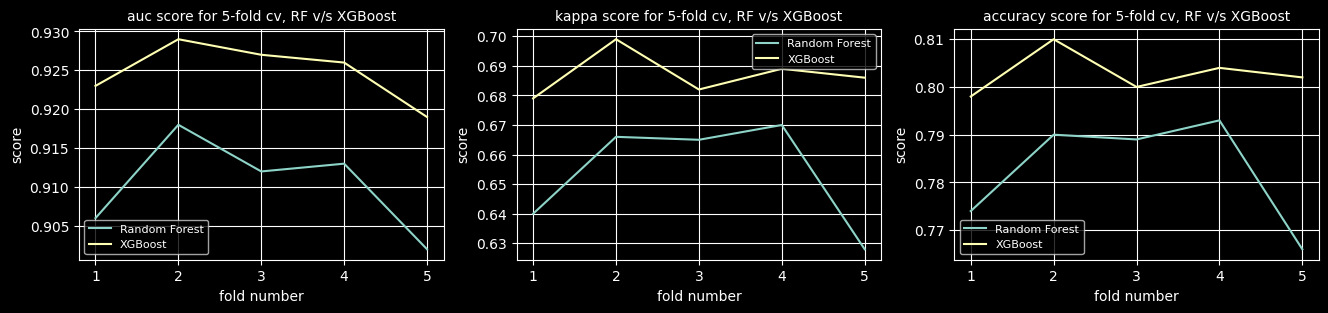

In [ ]:
plot_crossval_results([cv_results_rf,cv_results_xgb], ["Random Forest", "XGBoost"], "RF v/s XGBoost")

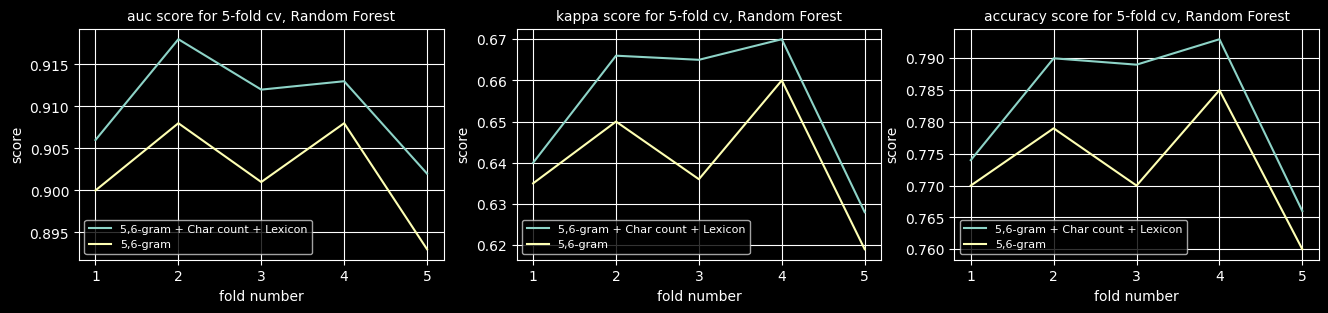

In [ ]:
plot_crossval_results([cv_results_rf,cv_results_rf_1], ["5,6-gram + Char count + Lexicon", "5,6-gram"], "Random Forest")

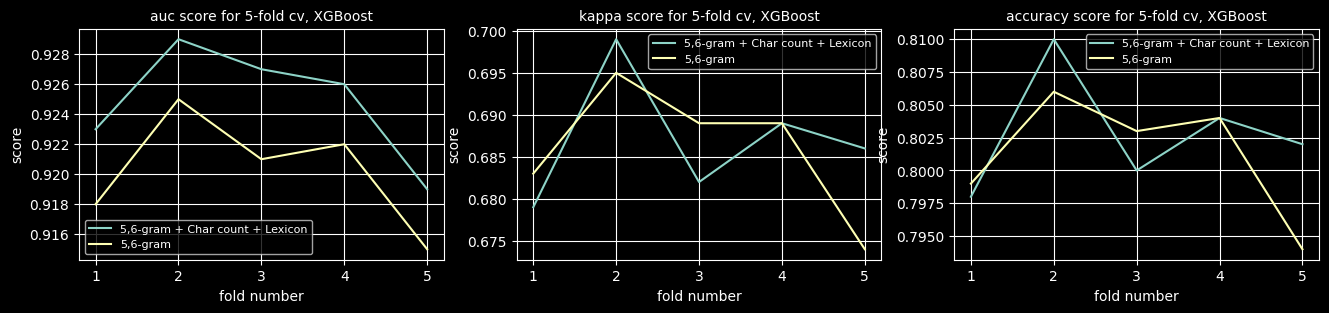

In [ ]:
plot_crossval_results([cv_results_xgb,cv_results_xgb_1], ["5,6-gram + Char count + Lexicon", "5,6-gram"], "XGBoost")

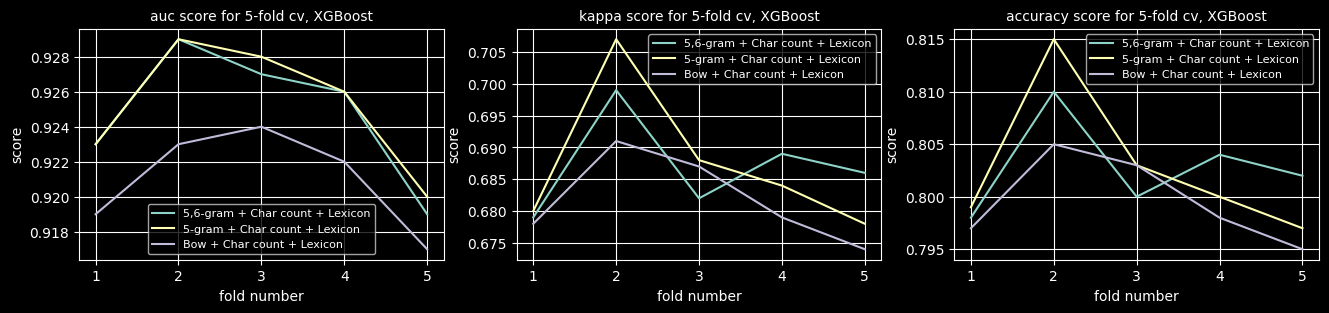

In [ ]:
plot_crossval_results([cv_results_xgb, cv_results_xgb_2_2, cv_results_xgb_2_1], ["5,6-gram + Char count + Lexicon", "5-gram + Char count + Lexicon", "Bow + Char count + Lexicon"], "XGBoost")

In [ ]:
agreement_experiment_0 # agreement en experimento 0 para muestra del 33% del dataset de entrenamiento (rf vs xgb)

array([[41.05680972, 13.84271893, 34.38352766, 89.28305631],
       [37.48449516, 12.57752419, 29.02505582, 79.08707517],
       [38.07988092, 13.69387249, 29.22351774, 80.99727115]])

In [ ]:
agreement_experiment_01_rf # agreement en experimento 1 para muestra del 33% del dataset de entrenamiento (rf exp 0 v/s rf exp 1)

array([[41.32969486, 14.98387497, 36.71545522, 93.02902506],
       [37.48449516, 12.57752419, 29.02505582, 79.08707517],
       [36.93872488, 12.70156289, 28.35524684, 77.99553461]])

In [ ]:
agreement_experiment_01_xgb # agreement en experimento 1 para muestra del 33% del dataset de entrenamiento (rf exp 0 v/s rf exp 1)

array([[41.72661871, 15.25676011, 35.8967998 , 92.88017862],
       [38.07988092, 13.69387249, 29.22351774, 80.99727115],
       [37.48449516, 13.69387249, 29.39717192, 80.57553957]])

In [ ]:
agreement_experiment_02 # agreement en experimento 2 para muestra del 33% del dataset de entrenamiento (xgb exp 0 v/s xgb exp 2.1 v/s xgb exp 2.2)

array([[41.87546515, 14.73579757, 35.32622178, 91.9374845 ],
       [38.07988092, 13.69387249, 29.22351774, 80.99727115],
       [38.03026544, 13.39617961, 29.5708261 , 80.99727115],
       [37.98064996, 13.81791119, 29.04986356, 80.84842471]])

In [ ]:
# agreement sobre target
print(agreement_experiment_0_target[0],'\n',agreement_experiment_01_rf_target[0],
      '\n',agreement_experiment_01_xgb_target[0], '\n',agreement_experiment_02_target[0])

[40.43876883 13.03208906 35.3962017  88.86705959] 
 [41.12639162 13.88343157 37.26260642 92.2724296 ] 
 [41.32285527 14.80026195 36.90242305 93.02554028] 
 [42.59986902 14.57105435 37.42632613 94.59724951]


In [ ]:
cv_results_rf

(array([[0.906, 0.64 , 0.774],
        [0.918, 0.666, 0.79 ],
        [0.912, 0.665, 0.789],
        [0.913, 0.67 , 0.793],
        [0.902, 0.628, 0.766]]),
 array([0.9102, 0.6538, 0.7824]))

In [ ]:
# medias y desviación para validación cruzada en cada experimento

print(cv_results_rf[0].mean(axis=0),cv_results_rf[0].std(axis=0), # exp. 0 rf
      '\n',
      cv_results_xgb[0].mean(axis=0),cv_results_xgb[0].std(axis=0), # exp. 0 xgb
      '\n',
      cv_results_rf_1[0].mean(axis=0),cv_results_rf_1[0].std(axis=0), # exp. 1 rf
      '\n',
      cv_results_xgb_1[0].mean(axis=0),cv_results_xgb_1[0].std(axis=0), # exp. 1 xgb
      '\n',
      cv_results_xgb_2_1[0].mean(axis=0),cv_results_xgb_2_1[0].std(axis=0), # exp. 2.1 xgb
      '\n',
      cv_results_xgb_2_2[0].mean(axis=0),cv_results_xgb_2_2[0].std(axis=0) # exp. 2.2 xgb
      )

[0.9102 0.6538 0.7824] [0.0056     0.01669012 0.01051856] 
 [0.9248 0.687  0.8028] [0.00348712 0.00689928 0.00411825] 
 [0.902  0.64   0.7728] [0.00562139 0.01401428 0.00856505] 
 [0.9202 0.686  0.8012] [0.00342929 0.0070993  0.00426146] 
 [0.921  0.6818 0.7996] [0.00260768 0.00624179 0.00377359] 
 [0.9252 0.6874 0.8028] [0.00331059 0.0103846  0.0064    ]


## **7. Resultados**




| No. | Approach        |               | AUC   | Kappa | Accuracy |
| --- | --------------- | ------------- | ----- | ----- | -------- |
|     | Features        | Clasifier     |       |       |          |
| 0 | Baseline BOW + (!,?,#,@)_count (no pps) | MultinomialNB | 0.875 | 0.559 | 0.727 |
| 1 | 5,6-Char_Gram+Chars_Count| RandomForest| 0.906 | 0.652 | 0.780 |
| 2 | 5,6-Char_Gram+Chars_Count| XGBoost| 0.924 | 0.694 | 0.806 |
| 3 | 5,6-Char_Gram+Chars_Count+Lexicon | RandomForest | 0.914 | 0.669 | 0.791 |
| **4** | **5,6-Char_Gram+Chars_Count+Lexicon** | **XGBoost** | **0.928** | **0.700** | **0.810**|
| 5 | BOW+Chars_Count+Lexicon | XGBoost | 0.926 | 0.699 | 0.810 |
| 6 | 5-Char_Gram+Chars_Count+Lexicon | XGBoost | 0.928 | 0.698 | 0.808 |

<small>**Tabla 1**: Desempeño de métodos en conjunto de validación (33%)</small>

| Dummy type | AUC   | Kappa | Accuracy |
| ----- | ----- | ----- | -------- |
| tags = 'normal' | 1.0 | - | 1.0 |
| uniform distributed tags | 0.505 | 0.008 | 0.339 |
| non-uniform distributed tags | 0.495 | -0.01 | 0.406 |

<small>**Tabla 2**: Desempeño de clasificadores en dummy datasets (test 33%) </small>


| Test       |            | Agreement (%)|          |            |
| ---------- | :----------: | :----------: | :----------: | :----------: |
|            | incivilidad | odio    |   normal    |    **total**        |
| train (33%)| 41.06 | 13.84 | 34.38 | **89.28** |
| target (100%)| 40.44 |  13.03 | 35.40 | **88.87** |

 <small>**Tabla 3**: Agreement entre predicciones de RF y XGBoost utilizando 5,6-gramas a nivel de letras y custom features.</small>

| Test       |            | Agreement (%)|          |            |
| ---------- | :----------: | :----------: | :----------: | :----------: |
|            | incivilidad | odio    |   normal    |    **total**        |
| train (33%)| 41.33 | 14.98 | 36.72 | **93.03** |
| target (100%)| 41.13 |  13.88 | 37.26 | **92.27** |

 <small>**Tabla 4**: Agreement entre predicciones de RF utlizando 5,6-gramas a nivel de letras y custom features y de RF empleando solo 5,6-gramas de letras.</small>

| Test       |            | Agreement (%)|          |            |
| ---------- | :----------: | :----------: | :----------: | :----------: |
|            | incivilidad | odio    |   normal    |    **total**        |
| train (33%)| 41.73 | 15.26 | 35.90 | **92.88** |
| target (100%)| 41.32 | 14.80 | 36.90 | **93.03** |

 <small>**Tabla 5**: Agreement entre predicciones de XGBoost utlizando 5,6-gramas a nivel de letras y custom features y de XGBoost empleando solo 5,6-gramas de letras.</small>

| Test       |            | Agreement (%)|          |            |
| ---------- | :----------: | :----------: | :----------: | :----------: |
|            | incivilidad | odio    |   normal    |    **total**        |
| train (33%)| 41.88 | 14.74 | 35.33 | **91.94** |
| target (100%)| 42.60 | 14.57 | 37.43 | **94.60** |

 <small>**Tabla 6**: Agreement entre predicciones de XGBoost utlizando 5,6-gramas a nivel de letras, XGBoost empleando BOW y XGBoost con vectorizador de 5-gramas a nivel de letras, considerando custom features.</small>

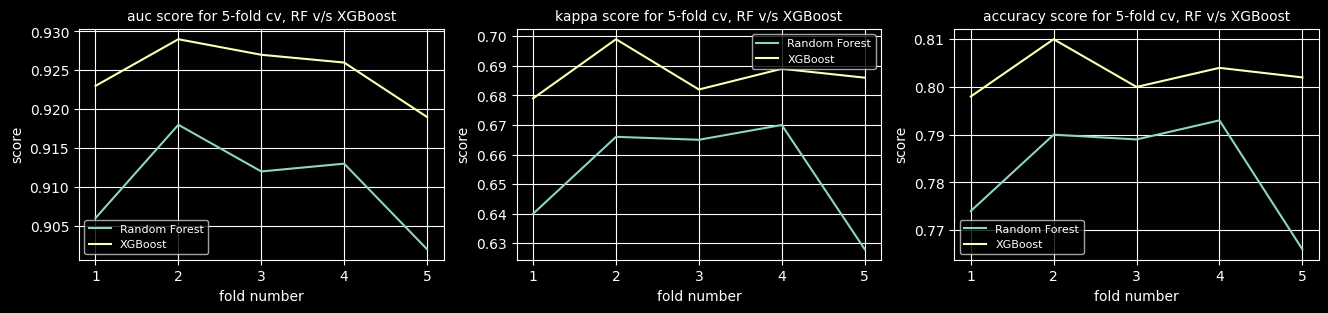

<small>**Figura 1**: Desempeño de clasificadores de RandomForest y XGBoost en validación cruzada de 5 iteraciones con estratificación sobre dataset de entrenamiento. Se consideran atributos obtenidos manualmente en conjunto con vectores dados por 5,6-gramas a nivel de caracteres.</small>

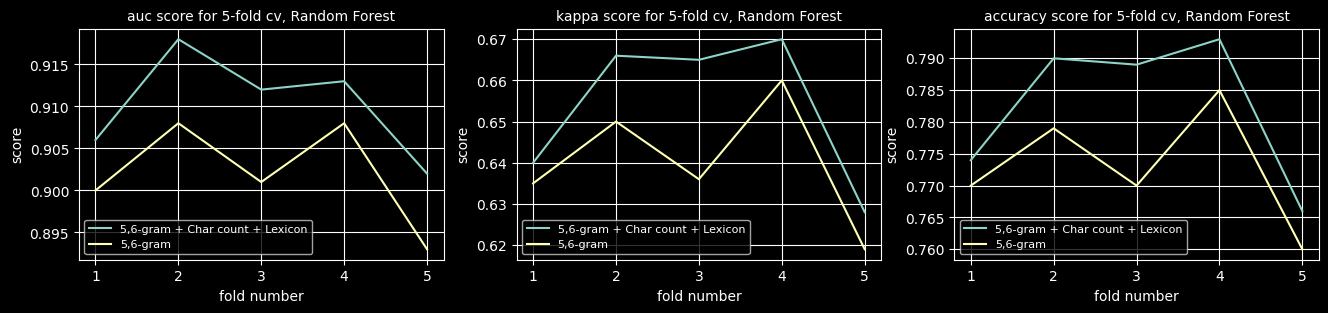

<small>**Figura 2**: Desempeño de clasificador RandomForest en validación cruzada de 5 iteraciones con estratificación sobre dataset de entrenamiento. Se considera vectorización de 5,6-gramas a nivel de letras, incluyendo y omitiendo custom features. </small>


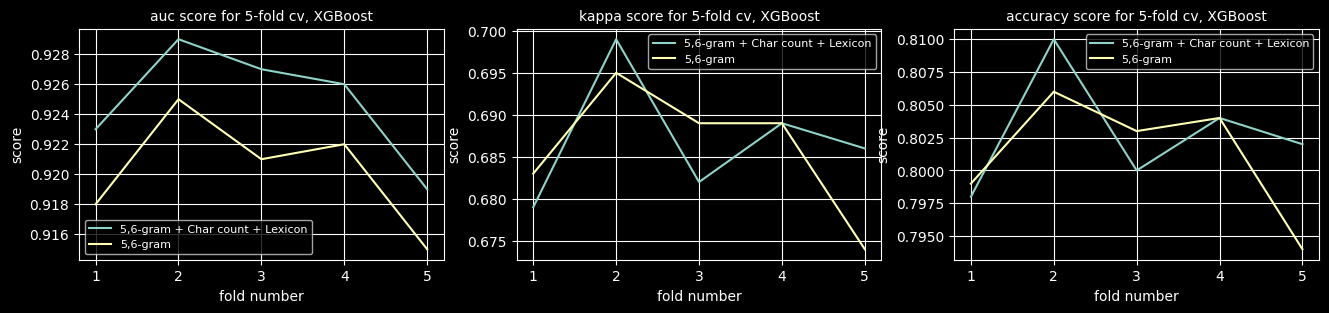

<small>**Figura 3**: Desempeño de clasificador XGBoost en validación cruzada de 5 iteraciones con estratificación sobre dataset de entrenamiento para vectorización de 5,6-gramas a nivel de letras, considerando y no considerando custom features. </small>

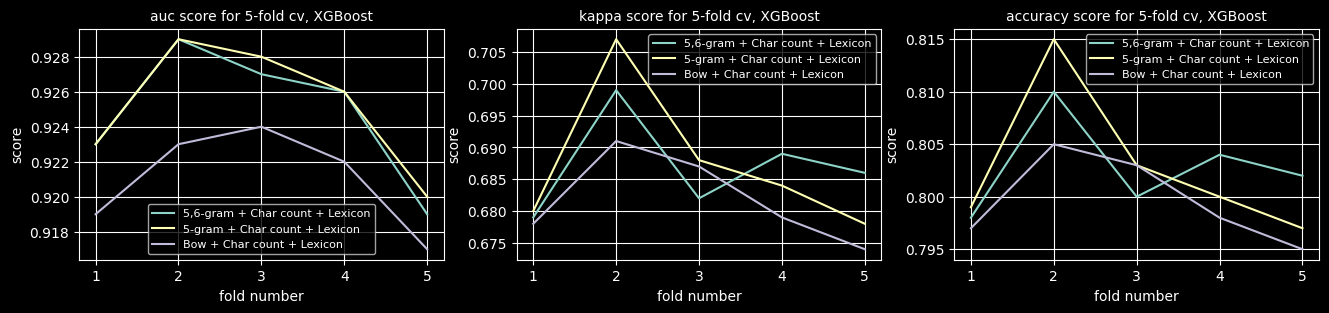

<small>**Figura 4**: Desempeño de clasificador XGBoost en validación cruzada de 5 iteraciones con estratificación sobre dataset de entrenamiento para custom features, en los casos de vectorización BOW, 5,6-gramas de caracteres y 5-gramas de caracteres.</small>


| No. | Approach        |               |   | mean |  | | std | |
| --- | --------------- | ------------- | ----- | ----- | ----- | ----- | ----- | ----- |
|     | Features        | Clasifier     |    AUC   |  kappa     |   acc      |    AUC   |  kappa     |   acc      |
| 1 | 5,6-Char_Gram+Chars_Count| RandomForest| 0.902 | 0.640 |  0.773 | 0.006 | 0.014 | 0.009 |
| 2 | 5,6-Char_Gram+Chars_Count| XGBoost| 0.920 | 0.686 | 0.801 | 0.003 | 0.007 | 0.004 |
| 3 | 5,6-Char_Gram+Chars_Count+Lexicon | RandomForest | 0.910 | 0.654 |0.782|0.006 | 0.017 | 0.011 |
| **4** | **5,6-Char_Gram+Chars_Count+Lexicon** | **XGBoost** | **0.925** | **0.687** | **0.803** | **0.003** | **0.007** | **0.004** |
| 5 | BOW+Chars_Count+Lexicon | XGBoost | 0.921 | 0.682 | 0.800| 0.003 | 0.006 | 0.003|
| 6 | 5-Char_Gram+Chars_Count+Lexicon | XGBoost | 0.925 | 0.687 | 0.803 | 0.003 | 0.010| 0.006 |

 <small>**Tabla 6**: Resumen de validación cruzada de 5-iteraciones estratificada sobre conjunto de entrenamiento para cada método.</small>

## **8. Conclusiones**


La tarea de realizar una clasificación de tweets fue exitosa, tanto en el manejo del dataset y su preprocesamiento como en las métricas obtenidas y algoritmos utilizados.
Se pudo apreciar en la sección de resultados que las mejoras hechas a los clasificadores incrementaron la eficiencia del baseline, por lo se puede decir que el preprocesamiento y el cambio de clasificador utilizados fueron buenas prácticas para esta competencia.

Por otro lado, el clasificador `XGBoost` entregó mejores resultados que `Random Forest`, en todas las métricas evaluadas (AUC, Kappa y Accuracy). Así, es posible concluir que este algoritmo es más eficiente para predecir la intención de un tweet, ya sea normal, de incivilidad u odio.
Con respecto a los features, se pudo observar que el uso de todas las técnicas probadas fue óptimo, en el sentido de que `5,6-Char Gram`, `Chars count` y `Lexicon` como features entregaron mejores resultados que no usar alguno de ellos. Sin embargo, es importante mencionar que el usar 5,6-gramas baja ligeramente la varianza en comparación con usar solo 5-gramas lo que afecta directamente la precisión, lo que se observó al hacer la cross-validation.

En términos de eficiencia en tiempo de ejecución, ningún algoritmo ni preprocesamiento tomó un tiempo excesivo.
El entrenamiento de los clasificadores fue la sección de código que más demoró sin superar los 10 minutos de ejecución cada uno, lo está dentro del tiempo que suelen tomar estas tareas.

A pesar de que hubo una gran flexibilidad al hacer este trabajo, se pudo notar que las técnicas vistas en el curso de Procesamiento de Lenguaje Natural entregan una muy buena base para abarcar este tipo de proyectos obteniendo buenos resultados. De la misma forma, librerías como `sklearn` y `spanish_nlp` fueron sustanciales para la realización de esta competencia.

A modo de mejora y trabajo a futuro surgieron dos ideas al comentarse como grupo, una fue que se podrían implementar y probar métodos con redes neuronales como MLP e investigar otros posibles features que puedan aumentar el rendimiento de los algoritmos y la otra es que se podría hacer un clasificador que ensamble otros modelos entrenados y luego usar majority voting.

Para finalizar, este proyecto es vital para poder clasificar intenciones en mensajes escritos y hace uso de la teoría de NLP y de otras ramas de machine learning. Se observaron buenos resultados en las métricas definidas y se espera poder mejorar con respecto a esto a medida que avancen los conocimientos obtenidos en el curso.


## **Referencias**

1. Bayer, J. & Bárd, P. (2020). *Hate speech and hate crime in the EU and the evaluation of online content regulation approaches*. [https://doi.org/10.2861/150309](https://doi.org/10.2861/150309)

2. Bhandari, A. (2023). *Guide to AUC ROC curve in machine learning : What is specificity?* Analytics Vidhya. Recuperado el 23 de abril de 2023, desde [https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#What_is_the_AUC-ROC_Curve?](https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#What_is_the_AUC-ROC_Curve?)

3. Chen, T. & Guestrin, C. (2016). *XGBoost: A Scalable Tree Boosting System*. En arXiv (Cornell University).[
https://doi.org/10.48550/arXiv.1603.02754](
https://doi.org/10.48550/arXiv.1603.02754)

4. Landis, J. & Koch, G (1977). *The measurement of observer agreement for categorical data. Biometrics*. [https://doi.org/10.2307/2529310](https://doi.org/10.2307/2529310)

5. Hastie, T., Tibshirani, R. & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction* (2nd ed.). Springer. [https://doi.org/10.1007/978-0-387-84858-7](https://doi.org/10.1007/978-0-387-84858-7)